2. Project: Bike Rental Forecasting

Task: The dataset (Location: /cxldata/datasets/project/bikes.csv) contains the hourly rental bike demand data. The goal is to develop a model to estimate the bike demand in future given the parameters as observed in the past.

We will perform following steps:

1. Importing the libraries
2. Loading the data
3. Cleaning the data
4. Adding derived features
6. Dividing the dataset into training and test dataset
7. Training several models and analyzing their performance
8. Improving the model by finding the best hyper-parameters and features
9. Selecting a model and evaluating using test dataset
10. Analyzing the residuals

1. Importing the libraries:

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error 
from sklearn import linear_model 
import matplotlib.pyplot as plt
import os

2. Loading the data:

In [2]:
filePath = '/cxldata/datasets/project/bikes.csv'
bikesData = pd.read_csv(filePath)
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [3]:
bikesData['yr'].unique()

array([0, 1])

In [4]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


3. Cleaning the data:

In [5]:
columnsToDrop = ['instant','casual','registered','atemp','dteday']
bikesData = bikesData.drop(columnsToDrop, axis=1)

In [6]:
columnsToScale = ['temp', 'hum', 'windspeed']
scaler = StandardScaler()
bikesData[columnsToScale] = scaler.fit_transform(bikesData[columnsToScale])
bikesData[columnsToScale].describe()


,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04
mean,3.497212e-16,-4.195150e-16,4.035529e-15
std,1.000029e+00,1.000029e+00,1.000029e+00
min,-2.477205e+00,-3.251166e+00,-1.553889e+00
25%,-8.153035e-01,-7.631431e-01,-6.996886e-01
50%,1.564696e-02,1.436398e-02,3.189880e-02
75%,8.465975e-01,7.918711e-01,5.198962e-01
max,2.612367e+00,1.932215e+00,5.399871e+00


4. Adding derived features:

In [7]:
bikesData['isWorking'] = np.where(np.logical_and(bikesData.workingday==1,bikesData.holiday==0),1,0)
bikesData['dayCount'] = pd.Series(range(bikesData.shape[0]))/24

5. Dividing the dataset into training and test dataset

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bikesData, test_size=0.3, random_state=42)
train_set.sort_values('dayCount', axis= 0, inplace=True)
test_set.sort_values('dayCount', axis= 0, inplace=True)
print(len(train_set), "train +", len(test_set), "test")

12165 train + 5214 test


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


6. Training several models and analyzing their performance

In [9]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [11]:
trainingLabels = train_set['cnt']
trainingCols = train_set.drop(['cnt'], axis=1)

In [12]:
dec_reg = DecisionTreeRegressor(random_state = 42)
dt_mae_scores = -cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(dt_mae_scores)

Scores: [40.24239934 50.64256368 40.13064914 42.842235   47.57189811 72.51315789
 58.14638158 47.45641447 50.81496711 96.52220395]
Mean: 54.68828702752671
Standard deviation: 16.658367090386708


In [13]:
dec_reg = DecisionTreeRegressor(random_state = 42)
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(dt_mse_scores)

Scores: [ 61.14189351  79.09830793  73.84003564  71.18965031  75.51331324
 113.97212263  96.748113    80.47178424  85.85670724 149.97437555]
Mean: 88.78063032818493
Standard deviation: 24.671209048322986


In [14]:
lin_reg = LinearRegression()
lr_mae_scores = -cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(lr_mae_scores)
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(lr_mse_scores)

Scores: [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
Mean: 110.43241256942318
Standard deviation: 31.426965705295196
Scores: [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
Mean: 141.19022901181816
Standard deviation: 37.55565075919512


In [15]:
forest_reg = RandomForestRegressor(n_estimators=150, random_state=42)
rf_mae_scores = -cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_absolute_error")
display_scores(rf_mae_scores)
rf_mse_scores = np.sqrt(-cross_val_score(forest_reg, trainingCols, trainingLabels, cv=10, scoring="neg_mean_squared_error"))
display_scores(rf_mse_scores)

Scores: [33.92720351 33.51703095 28.3474281  31.77018899 36.57862503 57.37621162
 40.95214912 40.64683114 37.50200658 84.51118969]
Mean: 42.51288647396531
Standard deviation: 15.879935378545577
Scores: [ 46.49651756  51.01798507  43.09990073  52.25986879  60.46738172
  93.65344003  66.34131376  65.08190223  61.41059692 131.90089086]
Mean: 67.17297976798574
Standard deviation: 25.42550998766068


7. Improving the model by finding the best hyper-parameters and features

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [120, 150], 'max_features': [10, 12], 'max_depth': [15, 28]},
]

In [17]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

In [18]:
grid_search.fit(trainingCols, trainingLabels)
print(grid_search.best_params_)

{'max_depth': 15, 'max_features': 10, 'n_estimators': 150}


In [19]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.00769023 0.00892679 0.00573477 0.58772364 0.00202466 0.01214099
 0.03440954 0.01637329 0.10087068 0.03787888 0.00830586 0.03356419
 0.14435648]


8. Evaluating Final model using test dataset

In [20]:
final_model = grid_search.best_estimator_
test_set.sort_values('dayCount', axis= 0, inplace=True)
test_x_cols = (test_set.drop('cnt', axis=1)).columns.values
test_y_cols = 'cnt'

X_test = test_set.loc[:,test_x_cols]
y_test = test_set.loc[:,test_y_cols]

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
final_mse = mean_squared_error(y_test, test_set.loc[:,'predictedCounts_test'])
print(np.sqrt(final_mse))
test_set.describe()

39.33461963615582


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,isWorking,dayCount,predictedCounts_test
count,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000,5214.000000
mean,2.481204,0.504411,6.480437,11.471423,0.030687,3.001534,0.685846,1.422133,-0.012980,-0.002944,0.012217,185.322785,0.685846,360.850898,186.570391
std,1.110062,0.500028,3.457991,6.887845,0.172484,1.995486,0.464223,0.637995,0.993567,0.995428,1.006002,177.755171,0.464223,207.769276,170.550180
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.477205,-3.251166,-1.553889,1.000000,0.000000,0.000000,1.516331
25%,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-0.815304,-0.763143,-0.699689,41.000000,0.000000,180.781250,49.811013
50%,2.000000,1.000000,6.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.015647,0.014364,0.031899,136.000000,1.000000,362.375000,144.918385
75%,3.000000,1.000000,9.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.742729,0.791871,0.519896,277.000000,1.000000,537.104167,271.474789
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.404630,1.932215,5.399871,977.000000,1.000000,724.041667,895.813998


9. Analyzing the residuals

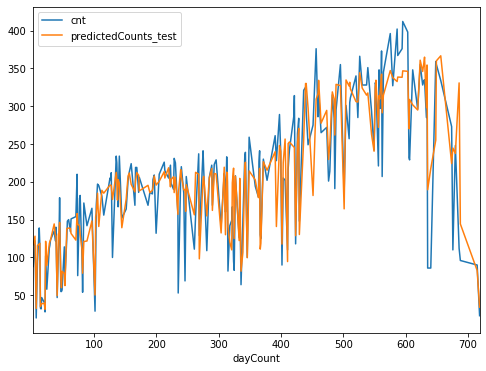

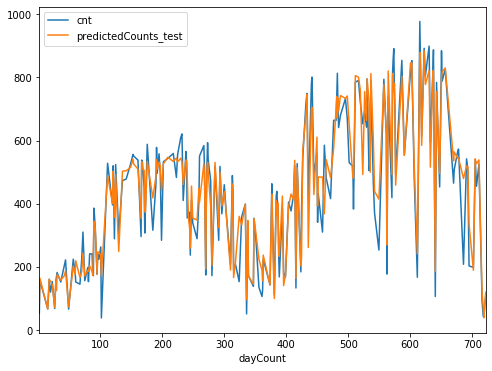

In [23]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()